In [ ]:
from heapy.util.data import msg_format
from heapy.util.time import fermi_utc_to_met
from heapy.data.retrieve import gbmRetrieve
from heapy.data.geometry import gbmGeometry
from heapy.data.event import gbmTTE
from heapy.data.response import gbmResponse

In [2]:
utc = '2024-02-19T06:21:42'
fermi_met = fermi_utc_to_met(utc)

In [3]:
gbm_rtv = gbmRetrieve.from_utc(utc=utc, t1=-400, t2=400)
gbm_rtv.rtv_res

{'utc': '2024-02-19T06:21:42.000',
 't1': -400.0,
 't2': 400.0,
 'datapath': '/Users/junyang/Documents/fermi/data/gbm/daily',
 'tte': {'n0': ['/Users/junyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n0_240219_06z_v00.fit.gz'],
  'n1': ['/Users/junyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n1_240219_06z_v00.fit.gz'],
  'n2': ['/Users/junyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n2_240219_06z_v00.fit.gz'],
  'n3': ['/Users/junyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n3_240219_06z_v00.fit.gz'],
  'n4': ['/Users/junyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n4_240219_06z_v00.fit.gz'],
  'n5': ['/Users/junyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n5_240219_06z_v00.fit.gz'],
  'n6': ['/Users/junyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n6_240219_06z_v00.fit.gz'],
  'n7': ['/Users/junyang/Documents/fermi/data/gbm/daily/2024/02/19/current/glg_tte_n7_2402

In [4]:
gbm_geo = gbmGeometry(file=gbm_rtv.rtv_res['poshist'])

In [5]:
gbm_geo.saa_passage(met=[fermi_met-100, fermi_met, fermi_met+100])

array([False, False, False], dtype=object)

In [6]:
gbm_geo.location_visible(ra=80.016, dec=25.541, met=[fermi_met-100, fermi_met, fermi_met+100])

array([True, True, True], dtype=object)

In [7]:
dets = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9','na','nb','b0','b1']

for det in dets:
    angle = gbm_geo.detector_angle(ra=80.016, dec=25.541, det=det, met=[fermi_met-100, fermi_met, fermi_met+100])
    print(det, angle)

n0 [61.07040464526969 57.40267111984303 53.74069319344193]
n1 [60.30457138111926 57.59842957622196 54.75421454615732]
n2 [60.504833645742515 61.09974603073652 61.40924112496014]
n3 [109.56398789539155 105.78367734887475 102.06431568609781]
n4 [155.71436051014962 151.96659750908262 148.25326243482584]
n5 [110.46402567849967 109.3588447183001 107.82487140399458]
n6 [74.38935653642858 70.9882472820314 67.897252438036]
n7 [86.37035476650404 83.9145446530393 81.8611040252281]
n8 [117.94848469837892 117.43231754979529 117.20795877298642]
n9 [26.234050862049354 23.381040023779185 21.208110013376768]
na [25.11398713018625 28.851258514959255 32.561284830397014]
nb [69.93561401106625 71.03535099237897 72.5627088055586]
b0 [113.57746961443728 112.3796119823658 110.74821889194325]
b1 [66.42253038556278 67.62038801763423 69.25178110805679]


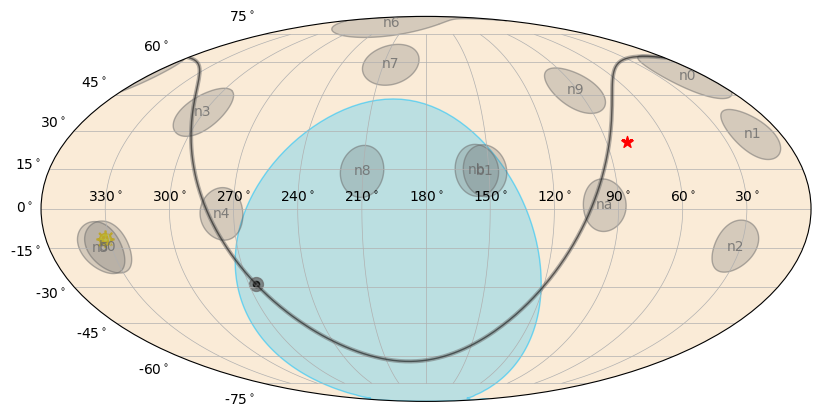

In [8]:
gbm_geo.extract_skymap(ra=80.016, dec=25.541, met=fermi_met, savepath='./geometry')

In [9]:
gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte']['n9'])
gbm_tte.event

TIME,PHA,ENERGY,DEAD_TIME
s,none,keV,
float64,int16,float64,float64
730015085.000096,15,20.56763415772793,2.6
730015085.000168,24,34.985634260687256,2.6
730015085.000454,49,97.03585377606865,2.6
730015085.000886,23,33.009447641623474,2.6
730015085.00157,21,28.644060697474934,2.6
730015085.003632,62,148.1107765408162,2.6
730015085.004286,126,961.9469789867566,2.6
730015085.005996,61,146.64459283236215,2.6


In [10]:
gbm_tte.timezero = fermi_met

In [11]:
gbm_tte.filter_time([-200, 300])
gbm_tte.event

TIME,PHA,ENERGY,DEAD_TIME
s,none,keV,
float64,int16,float64,float64
730016307.000038,1,5.748177095463011,2.6
730016307.001172,40,69.4897260664081,2.6
730016307.001322,7,11.129872980339927,2.6
730016307.001628,44,81.73006270307428,2.6
730016307.002356,21,28.63859163487658,2.6
730016307.00277,101,480.6920860528374,2.6
730016307.004216,8,12.188523313340085,2.6
730016307.004846,29,43.95825847503212,2.6


In [12]:
gbm_tte.filter_energy([10, 1000])
gbm_tte.event

TIME,PHA,ENERGY,DEAD_TIME
s,none,keV,
float64,int16,float64,float64
730016307.001172,40,69.4897260664081,2.6
730016307.001322,7,11.129872980339927,2.6
730016307.001628,44,81.73006270307428,2.6
730016307.002356,21,28.63859163487658,2.6
730016307.00277,101,480.6920860528374,2.6
730016307.004216,8,12.188523313340085,2.6
730016307.004846,29,43.95825847503212,2.6
730016307.00625,17,23.682295826799287,2.6


In [13]:
print(msg_format('extract light curve for n9'))

gbm_tte.lc_binsize = 2
gbm_tte.extract_curve(savepath='./n9/curve', show=True)


+------------------------------------------------+
 extract light curve for n9
+------------------------------------------------+


In [14]:
gbm_tte.extract_rebin_curve(min_sigma=2, savepath='./n9/curve', loglog=True, show=True)

In [15]:
print(msg_format('calculate txx for n9'))
gbm_tte.calculate_txx(xx=0.9, savepath='./n9/curve/t90')


+------------------------------------------------+
 calculate txx for n9
+------------------------------------------------+

+------------------------------------------------+
 id#  Txx       Txx-    Txx+    Txx1    Txx2    
+-----------------------------------------------+
 1    56.825    4.524   8.072   5.372   62.197  
+------------------------------------------------+


In [16]:
print(msg_format('extract spectrum for n9'))

gbm_tte.filter_time([-400, 400])

gbm_tte.spec_slices = [[0, 70]]
gbm_tte.extract_spectrum(savepath='./n9/spectrum', show=True)


+------------------------------------------------+
 extract spectrum for n9
+------------------------------------------------+


In [17]:
gbm_resp = gbmResponse(gbm_rtv.rtv_res['tte']['n9'][0], 
                       gbm_rtv.rtv_res['poshist'][0])
gbm_resp.timezero = fermi_met
gbm_resp.spec_slices = [[0, 70]]
gbm_resp.extract_response(ra=80.016, 
                          dec=25.541, 
                          savepath=f'./n9/spectrum')

/Users/junyang/miniforge3/lib/python3.12/site-packages/responsum/response.py:108: RuntimeWarning:

Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.380217552185059)



In [18]:
for det in ['n9', 'na']:
    gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte'][det])
    gbm_tte.timezero = fermi_met
    gbm_tte.filter_time([-200, 300])
    gbm_tte.filter_energy([10, 1000])

    print(msg_format(f'extract light curve for {det}'))
    
    gbm_tte.lc_binsize = 2
    gbm_tte.extract_curve(savepath=f'./{det}/curve', show=True)


+------------------------------------------------+
 extract light curve for n9
+------------------------------------------------+



+------------------------------------------------+
 extract light curve for na
+------------------------------------------------+


In [19]:
for det in ['n9', 'na']:
    gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte'][det])
    gbm_tte.timezero = fermi_met
    gbm_tte.filter_time([-200, 300])
    gbm_tte.filter_energy([10, 1000])

    print(msg_format(f'calculate txx for {det}'))
    
    gbm_tte.lc_binsize = 2
    gbm_tte.calculate_txx(xx=0.9, savepath=f'./{det}/curve/t90')
    gbm_tte.calculate_txx(xx=1.0, savepath=f'./{det}/curve/t100')


+------------------------------------------------+
 calculate txx for n9
+------------------------------------------------+

+------------------------------------------------+
 id#  Txx       Txx-    Txx+    Txx1    Txx2    
+-----------------------------------------------+
 1    57.324    4.787   7.784   5.372   62.696  
+------------------------------------------------+

+------------------------------------------------+
 id#  Txx       Txx-    Txx+    Txx1    Txx2    
+-----------------------------------------------+
 1    68.789    6.901   10.469  0.886   69.675  
+------------------------------------------------+

+------------------------------------------------+
 calculate txx for na
+------------------------------------------------+

+------------------------------------------------+
 id#  Txx       Txx-    Txx+    Txx1    Txx2    
+-----------------------------------------------+
 1    49.351    13.999  14.712  21.333  70.683  
+-----------------------------------------------

In [20]:
for det in ['n9', 'na', 'b1']:
    gbm_tte = gbmTTE(gbm_rtv.rtv_res['tte'][det])
    gbm_tte.timezero = fermi_met
    gbm_tte.filter_time([-400, 400])
    
    print(msg_format(f'extract spectrum for {det}'))
    
    gbm_tte.spec_slices = [[0, 70]]
    gbm_tte.extract_spectrum(savepath=f'./{det}/spectrum', show=True)


+------------------------------------------------+
 extract spectrum for n9
+------------------------------------------------+



+------------------------------------------------+
 extract spectrum for na
+------------------------------------------------+



+------------------------------------------------+
 extract spectrum for b1
+------------------------------------------------+


In [21]:
for det in ['n9', 'na', 'b1']:
    gbm_resp = gbmResponse(gbm_rtv.rtv_res['tte'][det][0], 
                           gbm_rtv.rtv_res['poshist'][0])
    gbm_resp.timezero = fermi_met
    gbm_resp.spec_slices = [[0, 70]]
    gbm_resp.extract_response(ra=80.016, 
                              dec=25.541, 
                              savepath=f'./{det}/spectrum')

/Users/junyang/miniforge3/lib/python3.12/site-packages/responsum/response.py:108: RuntimeWarning:

Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.380217552185059)

/Users/junyang/miniforge3/lib/python3.12/site-packages/responsum/response.py:108: RuntimeWarning:

Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (3.668320417404175)

